In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('googleplaystore.csv') #csv formatındaki verisetimizi okuyoruz.


In [4]:
df.head() #verisetimizin ilk satırların bakalım.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
df.columns #verisetimizdeki sütun isimlerini görelim

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(" ","_") #Sütun isimleri içerisindeki "düzensiz" yerleri '_' ifadesi ile dolduralım.

In [8]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [9]:
df.shape #verisetimizdeki satır ve sütun sayıları ekrana yazıldı

(10841, 13)

In [10]:
#10841 satır ve 13 sütun bulunuyor.
#Veri analizinde satırlara örneklem ve sütunlara öznitelik denir.
#Şimdi sütunların veri tiplerini kontrol edelim

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [12]:
#Gözüktüğü gibi sadece 'Rating' sütunu float tipinde. Fakat Size ve Install sütunları sayısal tipte olmalıdır.

In [13]:
#Şimdi eksik verileri ele alalım
#Eksik verileri ele almak veri analizinin önemli aşamalarından biridir
#O kadar önemlidir ki sadece bu eksik verilerin nasıl ele alınmasına dair tezler ve fikirler mevcuttur.

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [15]:
#Gözüktüğü gibi 'Rating' sütununda 1471, 'Type' sütununda 1, 
#'Content_Rating' sütununda 1,'Current_Ver sütununda 8've 'Androi_Ver'sütununda da 3 tane eksik veri olduğu gözükmektedir.

In [16]:
#Eksik verileri seaborn kütüphanesi ile görselleştirebiliriz

In [17]:
import seaborn as sns

In [18]:
sns.set_theme()
sns.set(rc={"figure.dpi":400,"figure.figsize":(12,9)}) #grafik kalitesi ve grafik boyutunu ayarlayalım

<AxesSubplot:>

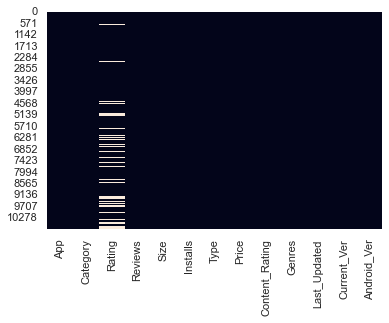

In [19]:
sns.heatmap(df.isnull(), cbar=False)  

In [25]:
sns.set_theme()
sns.set(rc={"figure.dpi":3000,"figure.figsize":(12,9)}) #daha dikkatli şekilde inceleyelim

In [26]:
sns.heatmap(df.isnull(), cbar=False)  

<AxesSubplot:>

MemoryError: 

<Figure size 36000x27000 with 1 Axes>

In [22]:
#Bu kısımda 'Rating' sütunundaki eksik verilerin olduğu açıkça bellidir. 
#Current_Ver sütunundaki birkaç eksi veri de gözüküyor.

In [39]:
df.to_csv( r'C:\Users\Batuhan Aslan\Desktop\Python Proje Tasarımı\export_dataframe.csv') 
#bu şekilde export işlemi yapabiliyoruz.


In [53]:
reytingev = df["Rating"].isnull() #Rating sütunundaki eksik verilerimizi 'reytingev' değişkenimize atıyoruz.

In [54]:
reytingev 

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10841, dtype: bool

In [59]:
reytingev.to_csv( r'C:\Users\Batuhan Aslan\Desktop\Python Proje Tasarımı\missingreyting_dataframe.csv')
#'Rating' sütunundaki aykırı verilerimizi boolean şeklinde yeni bir csv formatında dosyamıza kaydediyoruz.

In [60]:
tipev = df["Type"].isnull()

In [57]:
tipev

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Type, Length: 10841, dtype: bool

In [61]:
tipev.to_csv( r'C:\Users\Batuhan Aslan\Desktop\Python Proje Tasarımı\missingtip_dataframe.csv')
#'Type' sütunundaki aykırı verilerimizi boolean şeklinde yeni bir csv formatında dosyamıza kaydediyoruz.

In [62]:
içerikreytingev = df["Content_Rating"].isnull()

In [63]:
içerikreytingev

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Content_Rating, Length: 10841, dtype: bool

In [64]:
içerikreytingev.to_csv( r'C:\Users\Batuhan Aslan\Desktop\Python Proje Tasarımı\missingiçerikreyting_dataframe.csv')
#'Type' sütunundaki aykırı verilerimizi boolean şeklinde yeni bir csv formatında dosyamıza kaydediyoruz.

In [65]:
şuankiversiyonev = df["Current_Ver"].isnull()

In [66]:
şuankiversiyonev  

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Current_Ver, Length: 10841, dtype: bool

In [67]:
şuankiversiyonev.to_csv( r'C:\Users\Batuhan Aslan\Desktop\Python Proje Tasarımı\missingşuankiversiyon_dataframe.csv')
#'Type' sütunundaki aykırı verilerimizi boolean şeklinde yeni bir csv formatında dosyamıza kaydediyoruz.

In [68]:
androidversiyonev = df["Android_Ver"].isnull()

In [69]:
androidversiyonev

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Android_Ver, Length: 10841, dtype: bool

In [71]:
androidversiyonev.to_csv( r'C:\Users\Batuhan Aslan\Desktop\Python Proje Tasarımı\missingandroidversiyon_dataframe.csv')
#'Type' sütunundaki aykırı verilerimizi boolean şeklinde yeni bir csv formatında dosyamıza kaydediyoruz.